# 載入模組

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

# 載入資料CF10

In [2]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Load CIFAR 10
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

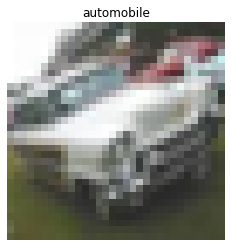

In [3]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

# 建立卷積及全連接層

In [4]:

CNN_layers = [Conv2D(32,(3,3), input_shape=(32,32,3), padding='same',activation='relu',name='Conv_1'),
              MaxPool2D(),
              Conv2D(64,(3,3),padding='same',activation='relu',name='Conv_2'),
              MaxPool2D(),
              Conv2D(128,(3,3),padding='same',activation='relu',name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=64, activation='relu'),
             Dense(units=10, activation='softmax')]

In [5]:
model_2 = Sequential(CNN_layers+FC_layers)
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 128)         73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8

In [6]:
model_2.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])

# 訓練模型

#### 修改batch_size為150修正一次，做3次

In [8]:
model_2.fit(X_train, y_train, 
          batch_size=150, 
          epochs=3,
          validation_data=(X_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.9005 - categorical_accuracy: 0.2806 - val_loss: 1.6886 - val_categorical_accuracy: 0.3633
Epoch 2/3
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.6213 - categorical_accuracy: 0.3931 - val_loss: 1.5367 - val_categorical_accuracy: 0.4333
Epoch 3/3
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.4884 - categorical_accuracy: 0.4505 - val_loss: 1.4038 - val_categorical_accuracy: 0.4873


# 準確度

In [9]:
score_train = model_2.evaluate(X_train, y_train, batch_size=1024)
score_test = model_2.evaluate(X_test, y_test, batch_size=1024)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 5s 537us/sample - loss: 1.4038 - categorical_accuracy: 0.4873
Train Accuracy: 48.263999819755554
Test Accuracy: 48.73000085353851


# 載入資料CF100

In [18]:
#讀cifar100資料
(u_train, v_train0), (u_test, v_test0) = datasets.cifar100.load_data()

#標準化
u_train = u_train / u_train.max()
u_test = u_test / u_test.max()

#Onehot encoding
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

# 定義CF100的FC層

In [25]:
FC_layers_CF100 = [Dense(units=64, activation='relu'),
                   Dense(units=32, activation='relu'),
                   Dense(units=100, activation='softmax')]

# 凍結借來的CNN層

In [26]:
for layer in CNN_layers:
    layer.trainable = False

# 組合

In [27]:
model_CF100=Sequential(CNN_layers+FC_layers_CF100)

In [28]:
model_CF100.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 128)         73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

# 匯集並訓練模型

In [29]:
model_CF100.compile(loss='categorical_crossentropy', 
                    optimizer=SGD(lr=0.1),
                    metrics=['categorical_accuracy'])
model_CF100.fit(u_train, v_train,
                batch_size=150, 
                epochs=3,
                validation_data=(u_test, v_test)
                )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 47s 936us/sample - loss: 4.4563 - categorical_accuracy: 0.0269 - val_loss: 4.2315 - val_categorical_accuracy: 0.0451
Epoch 2/3
50000/50000 [==============================] - 38s 751us/sample - loss: 4.0554 - categorical_accuracy: 0.0708 - val_loss: 3.9669 - val_categorical_accuracy: 0.0773
Epoch 3/3
50000/50000 [==============================] - 36s 728us/sample - loss: 3.8522 - categorical_accuracy: 0.1002 - val_loss: 3.8644 - val_categorical_accuracy: 0.0929


# 準確度

In [40]:
score_train = model_CF100.evaluate(U_train, v_train)
score_test = model_CF100.evaluate(U_test, v_test)
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 3s 333us/sample - loss: 3.8644 - categorical_accuracy: 0.0929
Train Accuracy: 9.554000198841095
Test Accuracy: 9.290000051259995


可知用Frozen的方法transfer learning後的準確率並不好

In [42]:
score_train = model_2.evaluate(X_train, y_train, batch_size=1024)
score_test = model_2.evaluate(X_test, y_test, batch_size=1024)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 3s 307us/sample - loss: 1.4038 - categorical_accuracy: 0.4873
Train Accuracy: 48.263999819755554
Test Accuracy: 48.73000085353851


因為使用frozen來借用，所以舊模型準確率是一樣的，沒有被重新訓練